In [139]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

It's a linear regression problem so I will be importing linear regression algorithm

In [113]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')

df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


CGPA is the label and Seat No can not concontribute into it, so I will drop it

In [114]:
df.drop('Seat No.', axis=1, inplace=True)

df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [115]:
df.dtypes

PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

all columns except label columns is object. I will create a datafram to hold them and convert to float

In [116]:
df.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

To replace null values with values I need to convert object values to numerical values and convert colums to numericaltype.
I will need to get all the unique values

In [117]:
# Getting all the unique values
unique_val = []
ff = []
for col in df:
    ff = df[col].unique().astype('str')
    if df.dtypes[col] == 'object':
        for i in ff:
            if unique_val.count(i) == 0:
                unique_val.append(i)      
print(unique_val)

['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+', 'F', 'nan', 'I', 'W']


In [118]:
grades = ['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+', 'F', 'nan', 'I', 'W']

custom_order = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'F', 'I', 'W', 'WU', 'nan']
ordered_grades = sorted(grades, key=lambda x: custom_order.index(x))

print(ordered_grades)

['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'F', 'I', 'W', 'WU', 'nan']


In [119]:
for col in df:
    df[col] = df[col].replace({'A+': 15, 'A': 14, 'A-': 13, 'B+': 12, 'B': 11, 'B-': 10, 'C+': 9, 'C': 8, 'C-': 7, 'D+': 6, 'D': 5, 'F': 4, 'I': 3, 'W': 2, 'WU': 1,})

In [120]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,10,6,7.0,8.0,7.0,6,5.0,7.0,10.0,7.0,...,7.0,7.0,7.0,7.0,13.0,14.0,7.0,11.0,13.0,2.205
1,14,5,6.0,5.0,10.0,8,5.0,14.0,6.0,5.0,...,6.0,5.0,8.0,5.0,13.0,10.0,8.0,8.0,11.0,2.008
2,14,11,14.0,10.0,12.0,14,10.0,12.0,13.0,13.0,...,11.0,11.0,14.0,8.0,14.0,14.0,14.0,13.0,14.0,3.608
3,5,9,6.0,5.0,5.0,13,6.0,7.0,5.0,9.0,...,6.0,8.0,6.0,7.0,10.0,11.0,9.0,9.0,9.0,1.906
4,13,13,13.0,12.0,14.0,14,13.0,12.0,14.0,13.0,...,10.0,12.0,12.0,10.0,13.0,14.0,13.0,13.0,14.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,11,14,14.0,13.0,15.0,14,13.0,13.0,15.0,12.0,...,13.0,13.0,14.0,14.0,14.0,12.0,12.0,11.0,14.0,3.798
567,15,14,14.0,14.0,14.0,14,14.0,13.0,14.0,14.0,...,12.0,12.0,14.0,14.0,13.0,11.0,13.0,8.0,13.0,3.772
568,11,14,13.0,12.0,14.0,14,14.0,14.0,14.0,11.0,...,13.0,11.0,14.0,12.0,14.0,8.0,12.0,13.0,13.0,3.470
569,14,12,5.0,14.0,5.0,6,10.0,7.0,10.0,7.0,...,5.0,11.0,11.0,7.0,5.0,8.0,11.0,10.0,8.0,2.193


In [121]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,570.000000,570.000000,569.000000,571.000000,569.000000,569.000000,569.000000,569.000000,...,561.000000,559.000000,559.000000,559.000000,486.000000,558.000000,558.000000,557.000000,492.000000,571.000000
mean,11.021016,9.809107,11.798246,10.635088,10.959578,11.994746,10.829525,10.912127,11.012302,10.059754,...,10.930481,10.078712,11.350626,9.486583,11.726337,12.281362,11.017921,10.874327,11.674797,2.954888
std,2.968770,2.724223,2.845710,3.126534,2.877814,2.500872,2.575092,2.979864,2.493977,3.070179,...,3.310235,2.601535,2.621006,2.597783,2.458146,2.263926,2.208934,2.612643,2.289606,0.620552
min,1.000000,4.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,4.000000,5.000000,2.000000,1.000000,2.000000,4.000000,4.000000,2.000000,0.800000
25%,9.000000,8.000000,10.250000,8.000000,9.000000,11.000000,10.000000,9.000000,9.000000,7.000000,...,8.000000,8.000000,10.000000,8.000000,11.000000,11.000000,10.000000,9.000000,11.000000,2.538000
50%,12.000000,10.000000,13.000000,11.000000,12.000000,13.000000,11.000000,12.000000,12.000000,10.000000,...,12.000000,10.000000,12.000000,10.000000,13.000000,13.000000,11.000000,11.000000,12.000000,3.029000
75%,13.000000,12.000000,14.000000,13.000000,13.000000,14.000000,13.000000,13.000000,13.000000,13.000000,...,14.000000,12.000000,14.000000,11.000000,13.000000,14.000000,13.000000,13.000000,13.000000,3.451000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,3.985000


Some columns are having null values, replave null values with mean mode values, the colums are categorical like


In [122]:
df['PH-121'].mode().iloc[0]

13

In [123]:
for col in df:
    if col != 'CGPA':
        df[col] = df[col].fillna(df[col].mode().iloc[0])
df  

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,10,6,7.0,8.0,7.0,6,5.0,7.0,10.0,7.0,...,7.0,7.0,7.0,7.0,13.0,14.0,7.0,11.0,13.0,2.205
1,14,5,6.0,5.0,10.0,8,5.0,14.0,6.0,5.0,...,6.0,5.0,8.0,5.0,13.0,10.0,8.0,8.0,11.0,2.008
2,14,11,14.0,10.0,12.0,14,10.0,12.0,13.0,13.0,...,11.0,11.0,14.0,8.0,14.0,14.0,14.0,13.0,14.0,3.608
3,5,9,6.0,5.0,5.0,13,6.0,7.0,5.0,9.0,...,6.0,8.0,6.0,7.0,10.0,11.0,9.0,9.0,9.0,1.906
4,13,13,13.0,12.0,14.0,14,13.0,12.0,14.0,13.0,...,10.0,12.0,12.0,10.0,13.0,14.0,13.0,13.0,14.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,11,14,14.0,13.0,15.0,14,13.0,13.0,15.0,12.0,...,13.0,13.0,14.0,14.0,14.0,12.0,12.0,11.0,14.0,3.798
567,15,14,14.0,14.0,14.0,14,14.0,13.0,14.0,14.0,...,12.0,12.0,14.0,14.0,13.0,11.0,13.0,8.0,13.0,3.772
568,11,14,13.0,12.0,14.0,14,14.0,14.0,14.0,11.0,...,13.0,11.0,14.0,12.0,14.0,8.0,12.0,13.0,13.0,3.470
569,14,12,5.0,14.0,5.0,6,10.0,7.0,10.0,7.0,...,5.0,11.0,11.0,7.0,5.0,8.0,11.0,10.0,8.0,2.193


In [124]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.00000,571.000000,571.000000,571.000000,571.000000
mean,11.021016,9.809107,11.802102,10.640981,10.966725,11.994746,10.837128,10.919440,11.019264,10.070053,...,11.001751,10.077058,11.406305,9.518389,11.915937,12.32049,11.063047,10.926445,11.858144,2.954888
std,2.968770,2.724223,2.844705,3.126963,2.875293,2.500872,2.573772,2.977192,2.492370,3.069716,...,3.324286,2.574030,2.621014,2.579459,2.312424,2.25262,2.203558,2.601252,2.173811,0.620552
min,1.000000,4.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,4.000000,5.000000,2.000000,1.000000,2.00000,4.000000,4.000000,2.000000,0.800000
25%,9.000000,8.000000,10.500000,8.000000,9.000000,11.000000,10.000000,9.000000,9.000000,7.000000,...,8.000000,8.000000,10.000000,8.000000,11.000000,11.50000,10.000000,9.000000,11.000000,2.538000
50%,12.000000,10.000000,13.000000,11.000000,12.000000,13.000000,11.000000,12.000000,12.000000,10.000000,...,12.000000,10.000000,12.000000,10.000000,13.000000,13.00000,11.000000,12.000000,13.000000,3.029000
75%,13.000000,12.000000,14.000000,13.000000,13.000000,14.000000,13.000000,13.000000,13.000000,13.000000,...,14.000000,12.000000,14.000000,11.000000,13.000000,14.00000,13.000000,13.000000,13.000000,3.451000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,3.985000


No more missing values, I don't suspect outliers. The columns are much I want to check for most contributing features.


In [125]:
# Select best performing features
from sklearn.feature_selection import SelectKBest, f_classif

# Seperate the label from the features
x = df.drop('CGPA', axis=1)

y = df['CGPA']

In [126]:
best_features = SelectKBest(score_func=f_classif,k=9)
fit = best_features.fit(x,y)
df_score = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(x.columns)

features_score = pd.concat([df_col,df_score], axis=1)

features_score.columns = ['feature_name', 'score']

print(features_score.nlargest(42,'score'))

   feature_name     score
15       CS-210  5.673902
33       CS-317  3.781644
26       CS-302  3.731221
2        CY-105  3.721947
0        PH-121  3.331921
29       EL-332  3.267504
20       CS-212  3.120626
21       CS-215  3.095380
18       CS-214  3.052191
28       MT-442  3.016682
31       CS-306  3.005382
25       CS-301  2.902599
16       CS-211  2.794688
8        EE-119  2.509355
39       CS-423  2.445627
3     HS-105/12  2.407437
6        CS-106  2.389740
22       MT-331  2.385761
5        CS-105  2.376907
35       CS-421  2.352416
14       MT-224  2.231503
34       CS-403  2.185390
4        MT-111  2.179982
9        ME-107  2.105636
38       CS-419  2.047831
37       CS-414  2.009861
24       HS-304  2.005255
17       CS-203  1.961939
19       EE-217  1.935533
10       CS-107  1.909280
13       EE-222  1.892965
7        EL-102  1.775311
12       MT-222  1.769225
11    HS-205/20  1.736225
27       TC-383  1.700328
1        HS-101  1.643284
40       CS-412  1.502690
30       CS-

I want to check for skewness

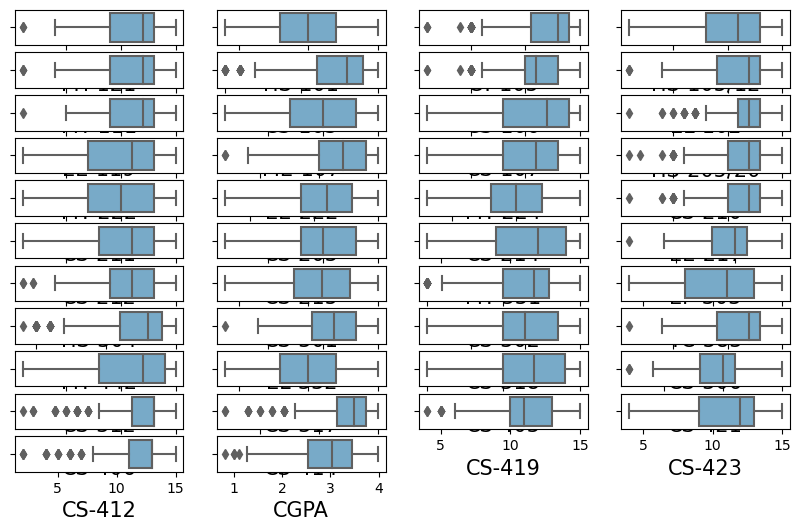

In [127]:
# Lets check for outliers using Boxplot
plt.figure(figsize=(10,6), facecolor='white')
plotnumber = 1
for col in df:
    if plotnumber <= 43:
        ax = plt.subplot(11,4, plotnumber)
        snb.boxplot(df[col], palette="Blues")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=180, fontsize=10)
    plotnumber += 1
plt.tight_layout()
plt.show()

In [128]:
#removing the outliers using zscore

from scipy.stats import zscore

out_features = df.drop('CGPA', axis=1)
z=np.abs(zscore(out_features))

z

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.344220,1.399462,1.689564,0.845324,1.380799,2.399165,2.269916,1.317643,0.409312,1.000987,...,1.007224,1.204848,1.196472,1.682619,0.977180,0.469210,0.746234,1.845474,0.028302,0.525739
1,1.004321,1.766861,2.041403,1.805562,0.336513,1.598742,2.269916,1.035627,2.015618,1.653084,...,2.089642,1.505929,1.974145,1.300753,1.753217,0.469210,1.031033,1.391265,1.126001,0.395111
2,1.004321,0.437533,0.773305,0.205165,0.359678,0.802525,0.325538,0.363264,0.795416,0.955306,...,0.796806,0.000527,0.358874,0.990445,0.589162,0.902036,0.746234,1.333992,0.797836,0.986164
3,2.029897,0.297265,2.041403,1.805562,2.076990,0.402314,1.881040,1.317643,2.417194,0.348889,...,1.368030,1.505929,0.807636,2.064485,0.977180,0.829267,0.586716,0.937056,0.741233,1.315960
4,0.667185,1.172331,0.421467,0.434994,1.055869,0.802525,0.841088,0.363264,1.196993,0.955306,...,0.796806,0.301608,0.747710,0.226712,0.186874,0.469210,0.746234,0.879782,0.797836,0.986164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0.007085,1.539730,0.773305,0.755074,1.403965,0.802525,0.841088,0.699446,1.598569,0.629257,...,0.436000,0.601633,1.136547,0.990445,1.738946,0.902036,0.142399,0.425573,0.028302,0.986164
567,1.341456,1.539730,0.773305,1.075153,1.055869,0.802525,1.229963,0.699446,1.196993,1.281354,...,0.796806,0.300553,0.747710,0.990445,1.738946,0.469210,0.586716,0.879782,1.126001,0.525739
568,0.007085,1.539730,0.421467,0.434994,1.055869,0.802525,1.229963,1.035627,1.196993,0.303208,...,0.436000,0.601633,0.358874,0.990445,0.962910,0.902036,1.919666,0.425573,0.797836,0.525739
569,1.004321,0.804932,2.393241,1.075153,2.076990,2.399165,0.325538,1.317643,0.409312,1.000987,...,0.436000,1.807009,0.358874,0.155154,0.977180,2.993395,1.919666,0.028637,0.356466,1.776385


In [129]:
df2 = df[(z<3).all(axis=1)]

df2

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,10,6,7.0,8.0,7.0,6,5.0,7.0,10.0,7.0,...,7.0,7.0,7.0,7.0,13.0,14.0,7.0,11.0,13.0,2.205
1,14,5,6.0,5.0,10.0,8,5.0,14.0,6.0,5.0,...,6.0,5.0,8.0,5.0,13.0,10.0,8.0,8.0,11.0,2.008
2,14,11,14.0,10.0,12.0,14,10.0,12.0,13.0,13.0,...,11.0,11.0,14.0,8.0,14.0,14.0,14.0,13.0,14.0,3.608
3,5,9,6.0,5.0,5.0,13,6.0,7.0,5.0,9.0,...,6.0,8.0,6.0,7.0,10.0,11.0,9.0,9.0,9.0,1.906
4,13,13,13.0,12.0,14.0,14,13.0,12.0,14.0,13.0,...,10.0,12.0,12.0,10.0,13.0,14.0,13.0,13.0,14.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,4,4,5.0,7.0,13.0,6,5.0,13.0,13.0,13.0,...,15.0,10.0,14.0,11.0,13.0,14.0,13.0,13.0,13.0,0.800
566,11,14,14.0,13.0,15.0,14,13.0,13.0,15.0,12.0,...,13.0,13.0,14.0,14.0,14.0,12.0,12.0,11.0,14.0,3.798
567,15,14,14.0,14.0,14.0,14,14.0,13.0,14.0,14.0,...,12.0,12.0,14.0,14.0,13.0,11.0,13.0,8.0,13.0,3.772
568,11,14,13.0,12.0,14.0,14,14.0,14.0,14.0,11.0,...,13.0,11.0,14.0,12.0,14.0,8.0,12.0,13.0,13.0,3.470


In [130]:
print('the shape of new data: ',df.shape[0])
print('the shape of old data: ',df2.shape[0])

the shape of new data:  571
the shape of old data:  531


Data loss is not much


In [131]:
# Checking for skewness

df2.skew()

PH-121      -0.842004
HS-101      -0.210719
CY-105      -1.250383
HS-105/12   -0.496986
MT-111      -0.682876
CS-105      -1.179361
CS-106      -0.891958
EL-102      -0.692595
EE-119      -0.767813
ME-107      -0.364742
CS-107      -0.580778
HS-205/20   -1.104078
MT-222      -0.342430
EE-222      -0.968397
MT-224      -0.637319
CS-210      -0.951890
CS-211      -0.187003
CS-203      -0.416198
CS-214      -0.057700
EE-217      -0.920952
CS-212      -0.588056
CS-215      -0.249578
MT-331      -0.792675
EF-303      -0.225306
HS-304      -0.489200
CS-301      -0.636347
CS-302      -0.933028
TC-383      -0.491724
MT-442      -1.132094
EL-332      -0.552210
CS-318      -0.380154
CS-306      -0.664098
CS-312      -0.367224
CS-317      -0.170295
CS-403      -0.695018
CS-421      -0.140307
CS-406      -1.634889
CS-414      -1.326045
CS-419      -0.659923
CS-423      -0.716791
CS-412      -1.234953
CGPA        -0.463562
dtype: float64

Skewed columns are to the left

In [133]:
for col in df:
    if (df[col].skew() < -0.5) or (df[col].skew() > 5):
        np.cbrt(df[col])
df.skew()

PH-121      -0.804915
HS-101      -0.172287
CY-105      -1.307629
HS-105/12   -0.494145
MT-111      -0.741118
CS-105      -1.117788
CS-106      -0.938399
EL-102      -0.742590
EE-119      -0.765022
ME-107      -0.328843
CS-107      -0.543148
HS-205/20   -1.355850
MT-222      -0.319727
EE-222      -0.959469
MT-224      -0.619894
CS-210      -1.008810
CS-211      -0.217277
CS-203      -0.423782
CS-214      -0.023535
EE-217      -0.927168
CS-212      -0.617199
CS-215      -0.292824
MT-331      -0.764554
EF-303      -0.313170
HS-304      -0.701306
CS-301      -0.579013
CS-302      -0.905432
TC-383      -0.431064
MT-442      -1.100499
EL-332      -0.610955
CS-318      -0.547352
CS-306      -0.692264
CS-312      -0.385123
CS-317      -0.189047
CS-403      -0.722310
CS-421      -0.267693
CS-406      -1.894639
CS-414      -1.755045
CS-419      -0.718000
CS-423      -0.720838
CS-412      -1.800803
CGPA        -0.497203
dtype: float64

In [134]:
# feature scaling using standard scalarization to avoid biasness

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,-0.344220,-1.399462,-1.689564,-0.845324,-1.380799,-2.399165,-2.269916,-1.317643,-0.409312,-1.000987,...,-1.007224,-1.204848,-1.196472,-1.682619,-0.977180,0.469210,0.746234,-1.845474,0.028302,0.525739
1,1.004321,-1.766861,-2.041403,-1.805562,-0.336513,-1.598742,-2.269916,1.035627,-2.015618,-1.653084,...,-2.089642,-1.505929,-1.974145,-1.300753,-1.753217,0.469210,-1.031033,-1.391265,-1.126001,-0.395111
2,1.004321,0.437533,0.773305,-0.205165,0.359678,0.802525,-0.325538,0.363264,0.795416,0.955306,...,0.796806,-0.000527,0.358874,0.990445,-0.589162,0.902036,0.746234,1.333992,0.797836,0.986164
3,-2.029897,-0.297265,-2.041403,-1.805562,-2.076990,0.402314,-1.881040,-1.317643,-2.417194,-0.348889,...,-1.368030,-1.505929,-0.807636,-2.064485,-0.977180,-0.829267,-0.586716,-0.937056,-0.741233,-1.315960
4,0.667185,1.172331,0.421467,0.434994,1.055869,0.802525,0.841088,0.363264,1.196993,0.955306,...,0.796806,-0.301608,0.747710,0.226712,0.186874,0.469210,0.746234,0.879782,0.797836,0.986164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.007085,1.539730,0.773305,0.755074,1.403965,0.802525,0.841088,0.699446,1.598569,0.629257,...,0.436000,0.601633,1.136547,0.990445,1.738946,0.902036,-0.142399,0.425573,0.028302,0.986164
567,1.341456,1.539730,0.773305,1.075153,1.055869,0.802525,1.229963,0.699446,1.196993,1.281354,...,0.796806,0.300553,0.747710,0.990445,1.738946,0.469210,-0.586716,0.879782,-1.126001,0.525739
568,-0.007085,1.539730,0.421467,0.434994,1.055869,0.802525,1.229963,1.035627,1.196993,0.303208,...,0.436000,0.601633,0.358874,0.990445,0.962910,0.902036,-1.919666,0.425573,0.797836,0.525739
569,1.004321,0.804932,-2.393241,1.075153,-2.076990,-2.399165,-0.325538,-1.317643,-0.409312,-1.000987,...,0.436000,-1.807009,0.358874,-0.155154,-0.977180,-2.993395,-1.919666,-0.028637,-0.356466,-1.776385


In [135]:
# Check for variance inflation factor to further check for multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif['Features'] = x.columns

vif

,VIF Values,Features
0,3.449031,PH-121
1,1.967544,HS-101
2,2.919199,CY-105
3,2.657077,HS-105/12
4,2.951590,MT-111
5,2.810597,CS-105
6,2.238272,CS-106
7,2.138433,EL-102
8,2.565997,EE-119
9,2.412041,ME-107


non is having a value higher than 5 which is the threshold

In [140]:
# VIF is within available range

# Finding best random state

from sklearn.model_selection import train_test_split

maxAccu = 0
maxRS = 0

for i in range(1,300):
    x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size =0.30, random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is : ', maxAccu, ' at random state : ',maxRS)


Best accuracy is :  0.9705119633625382  at random state :  106


In [141]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=maxRS)

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge


LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_LR))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_LR))
print('mean squared error : ',mean_squared_error(y_test, pred_LR))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_LR)))

R2 Score :  0.9705119633625382
R2 Score on training data :  92.94171528656663
mean absolute error :  0.08334371059976627
mean squared error :  0.010649149169186741
root mean squared error :  0.1031947148316557


In [143]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_RFR))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_RFR))
print('mean squared error : ',mean_squared_error(y_test, pred_RFR))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2 Score :  0.945460913665494
R2 Score on training data :  98.7276045652596
mean absolute error :  0.10695732558139516
mean squared error :  0.01969594900697669
root mean squared error :  0.14034225666910408


In [144]:
knn = KNN()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_knn))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_knn))
print('mean squared error : ',mean_squared_error(y_test, pred_knn))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_knn)))

R2 Score :  0.9701227741705956
R2 Score on training data :  91.1147199913346
mean absolute error :  0.08103837209302327
mean squared error :  0.010789698837209304
root mean squared error :  0.1038734751378296


In [145]:
GRR = GradientBoostingRegressor()
GRR.fit(x_train, y_train)
pred_GRR = GRR.predict(x_test)
pred_train = GRR.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_GRR))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_GRR))
print('mean squared error : ',mean_squared_error(y_test, pred_GRR))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_GRR)))

R2 Score :  0.9548970964719008
R2 Score on training data :  99.5634698396912
mean absolute error :  0.09597102217671381
mean squared error :  0.016288217270592407
root mean squared error :  0.12762530027620858


In [146]:
lasso = Lasso()
lasso.fit(x_train, y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_lasso))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_lasso))
print('mean squared error : ',mean_squared_error(y_test, pred_lasso))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2 Score :  -0.027014408484725694
R2 Score on training data :  0.0
mean absolute error :  0.5194748207728626
mean squared error :  0.37089039766600457
root mean squared error :  0.6090077156046585


In [147]:
ridge =Ridge()
ridge.fit(x_train, y_train)
pred_ridge = ridge.predict(x_test)
pred_train = ridge.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_ridge))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_ridge))
print('mean squared error : ',mean_squared_error(y_test, pred_ridge))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_ridge)))

R2 Score :  0.970817341973671
R2 Score on training data :  92.94157970860495
mean absolute error :  0.0829827686150629
mean squared error :  0.010538866398481662
root mean squared error :  0.10265898109021764


In [148]:
# Do cross validation for the models to validate model performance

from sklearn.model_selection import cross_val_score

#cross_val_score(model/estimate, features, target, CV=5, scoring='r2')

score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_LR) - score.mean())

[0.90277379 0.94561335 0.92206512 0.94690228 0.86312095]
0.9160950978226726
Difference between R2 score and cross validation score is  0.05441686553986558


In [149]:
score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_RFR) - score.mean())

[0.90085593 0.93960918 0.94068929 0.93979682 0.86219262]
0.916628765323322
Difference between R2 score and cross validation score is  0.02883214834217196


In [150]:
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_knn) - score.mean())

[0.88160506 0.93899097 0.87219421 0.97092369 0.80615167]
0.8939731185403599
Difference between R2 score and cross validation score is  0.07614965563023568


In [151]:
score = cross_val_score(GRR,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_GRR) - score.mean())

[0.94284022 0.9641403  0.94987547 0.94371127 0.88037213]
0.9361878788318695
Difference between R2 score and cross validation score is  0.018709217640031306


In [152]:
score = cross_val_score(lasso,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_lasso) - score.mean())

[-0.00643799 -0.0037979  -0.00364638 -0.00242138 -0.02411396]
-0.008083520623131602
Difference between R2 score and cross validation score is  -0.01893088786159409


In [153]:
score = cross_val_score(ridge,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_ridge) - score.mean())

[0.9029612  0.94569727 0.92223879 0.94728469 0.86320185]
0.916276758159978
Difference between R2 score and cross validation score is  0.05454058381369298


Best performing model is GRR

In [155]:
# Saving the model

import joblib

joblib.dump(GRR,'student_grade_predictor.pkl')

['student_grade_predictor.pkl']

In [156]:
model = joblib.load('student_grade_predictor.pkl')

prediction = model.predict(x_test)
prediction

array([3.73039105, 3.84194016, 3.154388  , 3.09658185, 2.25633161,
       2.96473091, 2.90711056, 2.99623052, 2.95980256, 3.73652653,
       3.17981198, 3.25774397, 3.23799035, 3.73133769, 2.16690153,
       3.23595138, 2.69025251, 3.62629113, 3.25003447, 2.93696637,
       2.3470337 , 2.8082141 , 2.75975007, 3.20172821, 2.93613598,
       3.12802987, 3.38982559, 3.61929285, 2.95540715, 3.63255447,
       3.89693022, 2.1618763 , 2.24387111, 2.50447838, 3.57461951,
       3.01320795, 2.6307693 , 2.79517071, 3.60817524, 2.99450589,
       2.92151386, 2.69050787, 1.92669954, 3.68377696, 3.91901296,
       3.65268428, 3.13336125, 3.7841213 , 3.63867788, 1.94570735,
       2.99093911, 3.63254105, 3.07766277, 2.23067075, 1.92229207,
       3.07169174, 3.22794601, 3.36325347, 3.91565716, 3.77356609,
       3.46017626, 2.9336608 , 3.8580195 , 2.48226448, 3.49477772,
       2.50001745, 2.6292579 , 3.78543946, 2.94160897, 3.54294729,
       2.76041534, 2.6551182 , 3.16500846, 3.57164422, 3.03063